# Variable Neighborhood Search (VNS) for TSP

## Import Libraries

In [181]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import griddata

## VNS Class

In [182]:
class VNS:
    def __init__(self, cities):
        self.cities = cities
        self.distance_matrix = self.calculate_distance_matrix()
        self.best_distance_history = [] 
        self.local_search_iterations = [] 
        self.improved_local_search_iterations = [] 
    
    def calculate_distance_matrix(self):
        num_cities = len(self.cities)
        matrix = np.zeros((num_cities, num_cities))
        for i in range(num_cities):
            for j in range(num_cities):
                matrix[i, j] = np.linalg.norm(self.cities[i] - self.cities[j])
        return matrix
    
    def calculate_distance(self, index1, index2):
        return self.distance_matrix[index1, index2]
    
    def total_distance(self, solution):
        distance = 0
        for i in range(len(solution)):
            distance += self.calculate_distance(solution[i], solution[(i + 1) % len(solution)])
        return distance
    
    @staticmethod
    def generate_initial_solution(num_cities):
        return np.random.permutation(num_cities)
    
    @staticmethod
    def shake(solution):
        n = len(solution)
        i, j = np.random.choice(range(n), size=2, replace=False)
        solution[i], solution[j] = solution[j], solution[i]
        return solution
    
    def local_search(self, solution):
        improved = True
        total_counter = 0
        improved_counter = 0
        while improved:
            improved = False
            for i in range(len(solution) - 1):
                for j in range(i + 2, len(solution)):  # Ensure segments do not overlap
                    # Calculate the difference in distance if we were to perform the swap
                    old_dist = self.calculate_distance(solution[i], solution[i + 1]) + \
                            self.calculate_distance(solution[j - 1], solution[j % len(solution)])
                    new_dist = self.calculate_distance(solution[i], solution[j - 1]) + \
                            self.calculate_distance(solution[i + 1], solution[j % len(solution)])
                    total_counter += 1
                    # If the new distance is shorter, perform the swap and mark an improvement
                    if new_dist < old_dist:
                        solution[i + 1:j] = solution[i + 1:j][::-1]  # This is the 2-opt swap
                        improved = True
                        improved_counter += 1
                        break  # Exit the inner loop to restart the search from the beginning
                if improved:
                    break  # Restart the outer loop if improvement was found

        self.local_search_iterations.append(total_counter)
        self.improved_local_search_iterations.append(improved_counter)
        return solution

    
    def run(self, max_iterations, k_max):
        n = len(self.cities)
        best_solution = self.generate_initial_solution(n)
        best_distance = self.total_distance(best_solution)

        k = 1
        iteration = 0
        while iteration < max_iterations:
            new_solution = self.shake(best_solution.copy())
            new_solution = self.local_search(new_solution)
            new_distance = self.total_distance(new_solution)

            if new_distance < best_distance:
                best_solution = new_solution
                best_distance = new_distance
                k = 1
            else:
                k += 1

            if k > k_max:
                k = 1
                iteration += 1
            
            # Record best distance for this iteration
            self.best_distance_history.append(best_distance)

        return best_solution, best_distance
    
    @staticmethod
    def plot_solution(solution, cities):
        plt.figure(figsize=(8, 6))
        plt.plot(cities[:, 0], cities[:, 1], 'o', markersize=8, color='blue')
        plt.plot(cities[solution, 0], cities[solution, 1], 'r-', linewidth=2)
        plt.plot([cities[solution[-1], 0], cities[solution[0], 0]],
                 [cities[solution[-1], 1], cities[solution[0], 1]], 'r-', linewidth=2) 
        plt.title('TSP Solution')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.grid(True)
        plt.show()

    def plot_progress(self):
        plt.figure(figsize=(10, 6))
        plt.plot(self.best_distance_history, marker='o', linestyle='-', markersize=5)
        plt.title('VNS Algorithm Progress Over Iterations')
        plt.xlabel('Iteration')
        plt.ylabel('Best Distance Found')
        plt.grid(True)
        plt.show()


## Reading and Preparing Data

In [183]:

def read_tsp_file(file_path):
    coordinates = []
    with open(file_path, 'r') as file:
        while True:
            line = file.readline()
            if line.strip() == 'NODE_COORD_SECTION':
                break
        for line in file:
            if line.strip() == 'EOF':
                break
            _, x, y = line.strip().split()
            coordinates.append([float(x), float(y)])
    return np.array(coordinates)
        

## Main Execution

Best solution: [13  9 20 28 29 31 34 36 37 32 33 35 30 26 27 23 21 24 25 22 19 14 12 15
 16 17 18 10 11  8  7  6  5  4  2  3  1  0]
Total distance: 6746.077522940473
Execution time: 0.5293879508972168 seconds


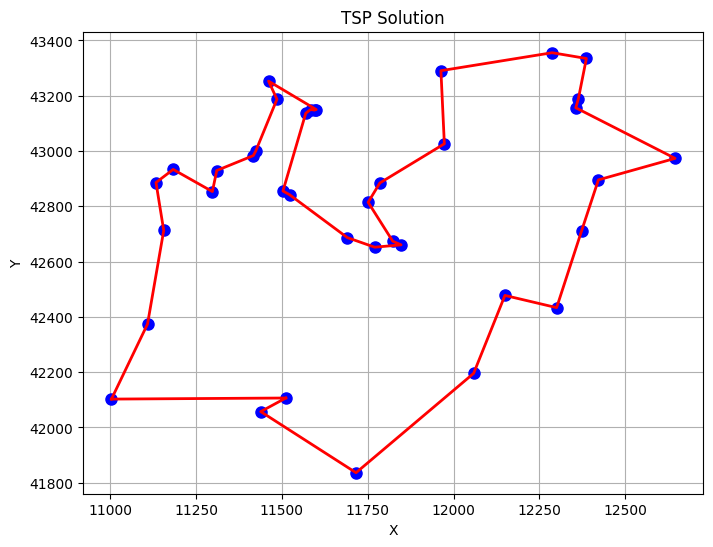

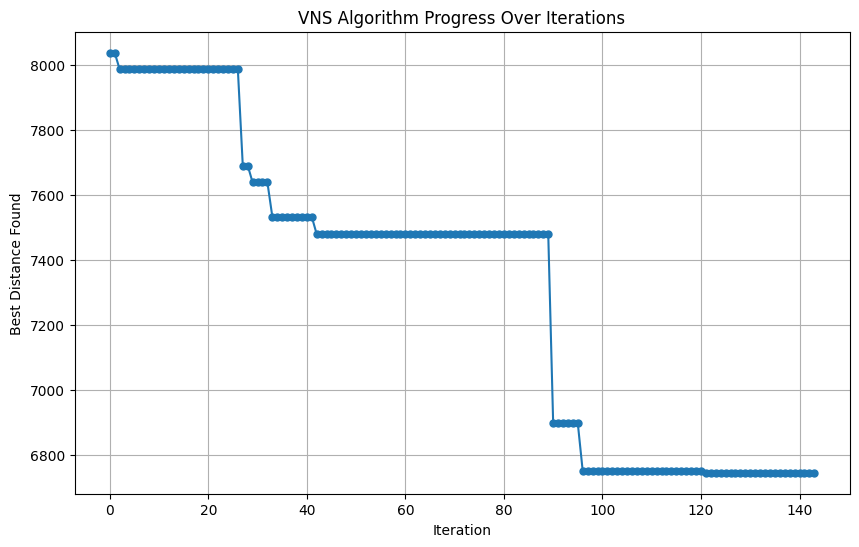

In [189]:

np.random.seed(41)

file_name = 'dj38.tsp'
cities = read_tsp_file(file_name)

# Start measuring time
start_time = time.time()

vns = VNS(cities)
best_solution, best_distance = vns.run(max_iterations=10, k_max=10)

# Measure the execution time
end_time = time.time()
duration = end_time - start_time

print('Best solution:', best_solution)
print('Total distance:', best_distance)
print(f"Execution time: {duration} seconds")
vns.plot_solution(best_solution, cities)
vns.plot_progress()
        

# Calculations for variable iterations and Kmax

In [203]:
import numpy as np
import time

# Parameters
iterations = [1, 2, 3, 4, 5, 6 ]
k_max_values = [1, 2, 3, 4, 5, 6]
results = []

tries = 5

# Initialize data structure to store all distances
all_distances = {}

# Run the VNS algorithm with different k_max and iteration settings
for k_max in k_max_values:
    for iter_count in iterations:
        distances = []
        durations = []  # Initialize list to store durations
        total_duration = 0
        best_distance = float('inf')  # Initialize to positive infinity
        worst_distance = float('-inf')  # Initialize to negative infinity
        for _ in range(tries):
            # Start measuring time
            start_time = time.time()
            
            best_solution, current_distance = vns.run(k_max, iter_count)

            # Measure the execution time
            end_time = time.time()
            duration = end_time - start_time

            distances.append(current_distance)
            durations.append(duration)
            total_duration += duration

            # Update best and worst distances
            best_distance = min(best_distance, current_distance)
            worst_distance = max(worst_distance, current_distance)

        # Store the distances
        all_distances[(k_max, iter_count)] = distances

        # Calculate average distance and standard deviation
        average_distance = np.mean(distances)
        std_distance = np.std(distances)

        # Calculate average duration and standard deviation
        average_duration = total_duration / tries
        std_duration = np.std(durations)

        # Store the results
        results.append((k_max, iter_count, average_distance, std_distance, average_duration, std_duration))

        # Printing of best, worst and average distances
        print(f'({k_max},{iter_count}): Best={best_distance}, Worst={worst_distance}, Average={average_distance}, Ideal=6656')

# Convert results to a numpy array for easier plotting
results_np = np.array(results)

(1,1): Best=6777.883741459556, Worst=7996.352790455448, Average=7325.376637577121, Ideal=6656
(1,2): Best=6659.431532931466, Worst=8688.851147399879, Average=7456.637077306613, Ideal=6656
(1,3): Best=6894.100656493209, Worst=7702.788778485627, Average=7221.867101132341, Ideal=6656
(1,4): Best=7304.43918767169, Worst=7750.685914683273, Average=7459.471825127977, Ideal=6656
(1,5): Best=6716.283143111636, Worst=8631.206571583185, Average=7553.952698355618, Ideal=6656
(1,6): Best=6659.431532931464, Worst=7942.006359287912, Average=7418.249522365669, Ideal=6656
(2,1): Best=6664.113570564627, Worst=7873.6564690339255, Average=7477.090345184013, Ideal=6656
(2,2): Best=7158.09271375774, Worst=7705.162261000084, Average=7453.961232732494, Ideal=6656
(2,3): Best=6858.0352873165975, Worst=7685.981599729181, Average=7318.724244920575, Ideal=6656
(2,4): Best=6790.89547648637, Worst=7667.036437910949, Average=7209.028876224233, Ideal=6656
(2,5): Best=6659.431532931465, Worst=7868.555594711041, Avera

### Plot 3D graph with all results

[7325.37663758 7456.63707731 7221.86710113 7459.47182513 7553.95269836
 7418.24952237 7477.09034518 7453.96123273 7318.72424492 7209.02887622
 7186.30330129 7040.17148653 7464.42282971 7409.3314596  7415.74989241
 7170.82816877 6828.51910931 6855.68566861 7772.81836165 7282.01206828
 7142.29297597 7090.85218285 6838.95810577 6879.35535218 7158.18689302
 6999.81661236 6812.8642828  6994.99796735 6809.93625735 7189.45780448
 7093.39850254 6963.07657526 7090.87513159 6986.41259822 6881.9922133
 6869.27305975]


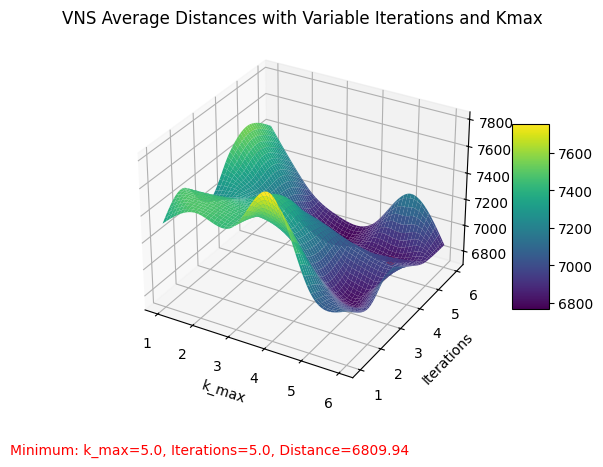

In [204]:
# Extracting k_max, iterations, and distances
k_max_plt = results_np[:, 0]
iter_plt = results_np[:, 1]
distance_plt = results_np[:, 2]

print(distance_plt)

# Find the minimum distance
min_distance = np.min(distance_plt)
min_index = np.argmin(distance_plt)
min_k_max = k_max_plt[min_index]
min_iter = iter_plt[min_index]

# Interpolation for a smoother surface
grid_x, grid_y = np.mgrid[min(k_max_plt):max(k_max_plt):100j, min(iter_plt):max(iter_plt):100j]
grid_z = griddata((k_max_plt, iter_plt), distance_plt, (grid_x, grid_y), method='cubic')

# Creating 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plotting the surface
surf = ax.plot_surface(grid_x, grid_y, grid_z, cmap='viridis', edgecolor='none')

# Highlighting the lowest distance
ax.scatter(min_k_max, min_iter, min_distance, color='r', s=30)  # Red color for visibility
# ax.text(min_k_max, min_iter, min_distance, f'Minimum: k_max={min_k_max}, Iterations={min_iter}, Distance={min_distance:.2f}', color='red')

# Labeling the axes
ax.set_xlabel('k_max')
ax.set_ylabel('Iterations')
ax.set_zlabel('Distance')

# Adding a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.title('VNS Average Distances with Variable Iterations and Kmax')
plt.figtext(0, 0, f'Minimum: k_max={min_k_max}, Iterations={min_iter}, Distance={min_distance:.2f}', fontsize = 10, color='r') 

plt.show()

### Plot graph (k, i) per distance with standard deviation

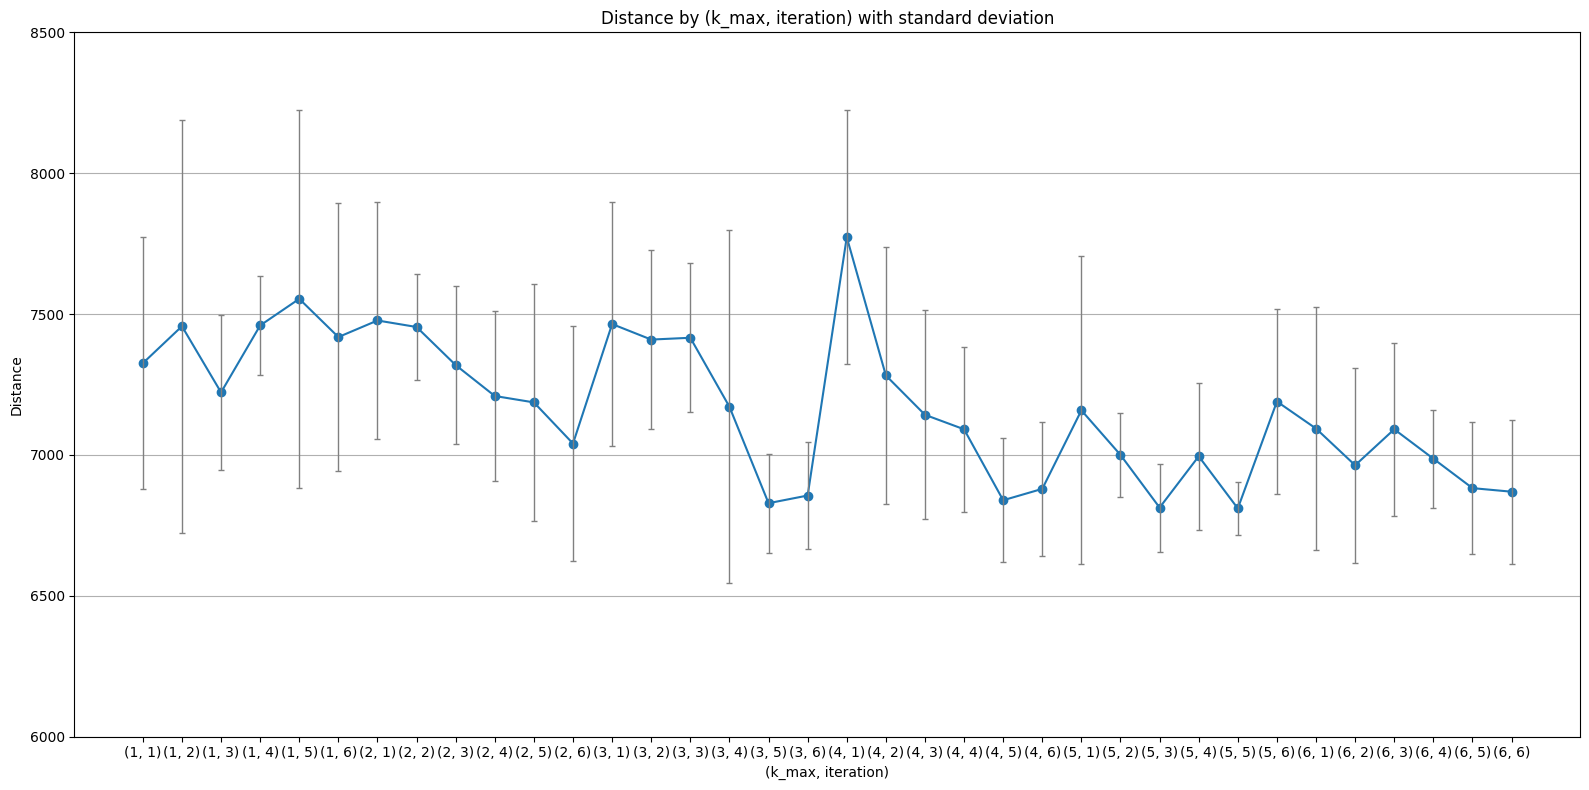

In [215]:
# Extract x and y values
x_values = [(k, i) for k in k_max_values for i in iterations]
y_values = [result[2] for result in results]
std_values = [result[3] for result in results]

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))

# Plotting connected points
ax.plot(range(len(x_values)), y_values, marker='o', linestyle='-')

# Error bars
for x, y, std in zip(range(len(x_values)), y_values, std_values):
    ax.errorbar(x, y, yerr=std, fmt='none', ecolor='gray', capsize=2, ls='-', lw=1)

# Setting labels and titles
ax.set_xlabel('(k_max, iteration)')
ax.set_ylabel('Distance')
ax.set_xticks(range(len(x_values)))
ax.set_xticklabels(x_values)
ax.set_title('Distance by (k_max, iteration) with standard deviation')
ax.yaxis.grid(True)

# Adjusting y-axis scale
ax.set_ylim(6000, 8500)

plt.tight_layout()
plt.show()


### Plot graph (k, i) per execution time with standard deviation

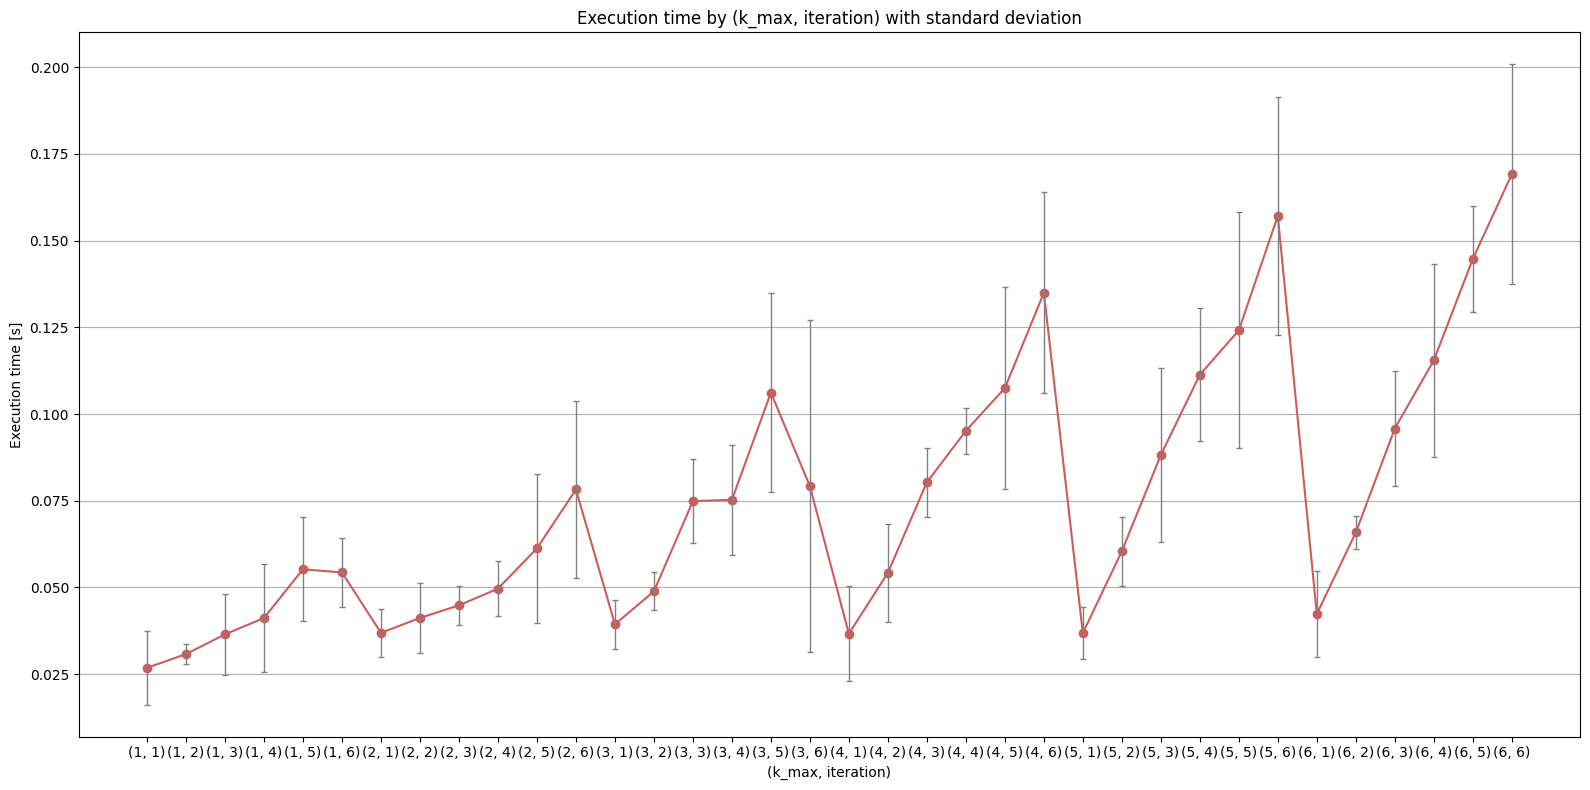

In [220]:
# Extract x and y values
x_values = [(k, i) for k in k_max_values for i in iterations]
y_values = [result[4] for result in results]
std_values = [result[5] for result in results]

# Plotting
fig, ax = plt.subplots(figsize=(16, 8))

# Plotting connected points
ax.plot(range(len(x_values)), y_values, marker='o', linestyle='-', color='indianred')

# Error bars
for x, y, std in zip(range(len(x_values)), y_values, std_values):
    ax.errorbar(x, y, yerr=std, fmt='none', ecolor='gray', capsize=2, ls='-', lw=1)

# Setting labels and titles
ax.set_xlabel('(k_max, iteration)')
ax.set_ylabel('Execution time [s]')
ax.set_xticks(range(len(x_values)))
ax.set_xticklabels(x_values)
ax.set_title('Execution time by (k_max, iteration) with standard deviation')
ax.yaxis.grid(True)

plt.tight_layout()
plt.show()
